In [1]:
import pandas as pd

In [2]:
# Replace 'heart.csv' with the actual path if your file is not in the working directory
df = pd.read_csv('heart.csv')

# View the first few rows to verify it loaded correctly
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [4]:
# Shape of the dataset (rows, columns)
print(f"Dataset Shape: {df.shape}")

# Column information
print(df.info())

# Statistical summary
print(df.describe())

Dataset Shape: (1025, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.9

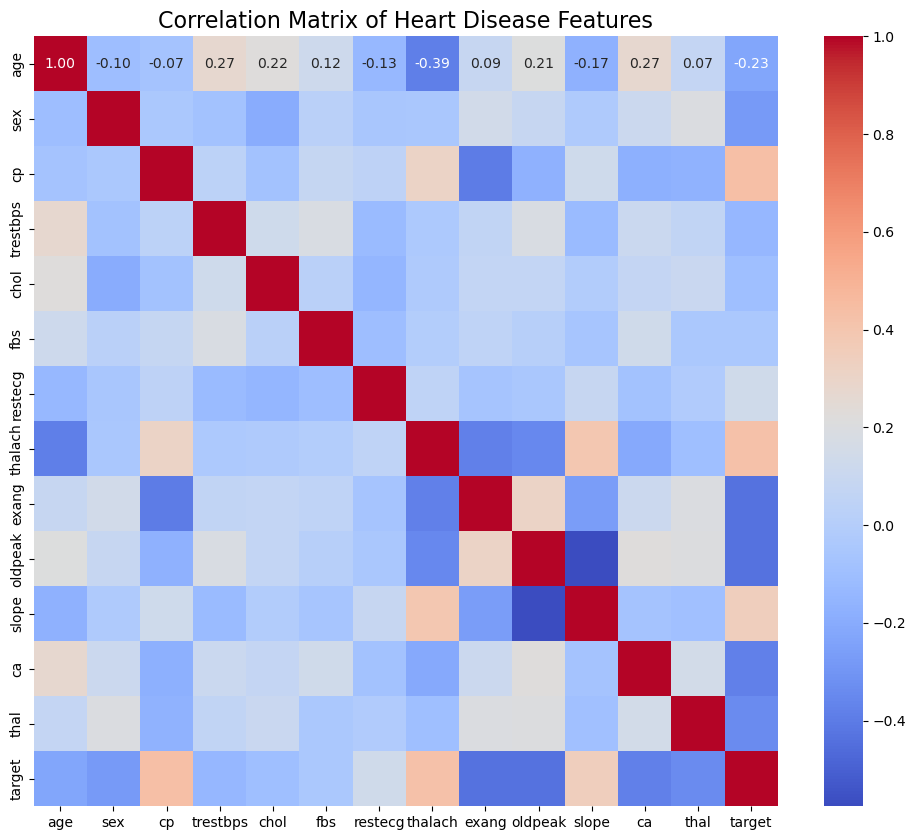

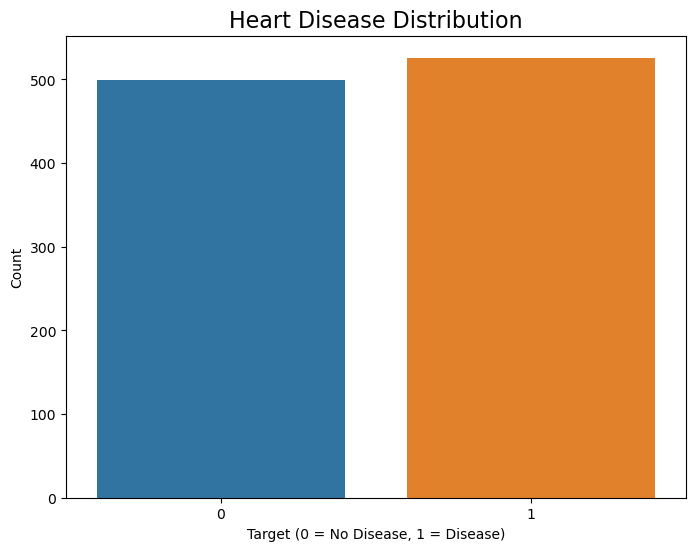

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


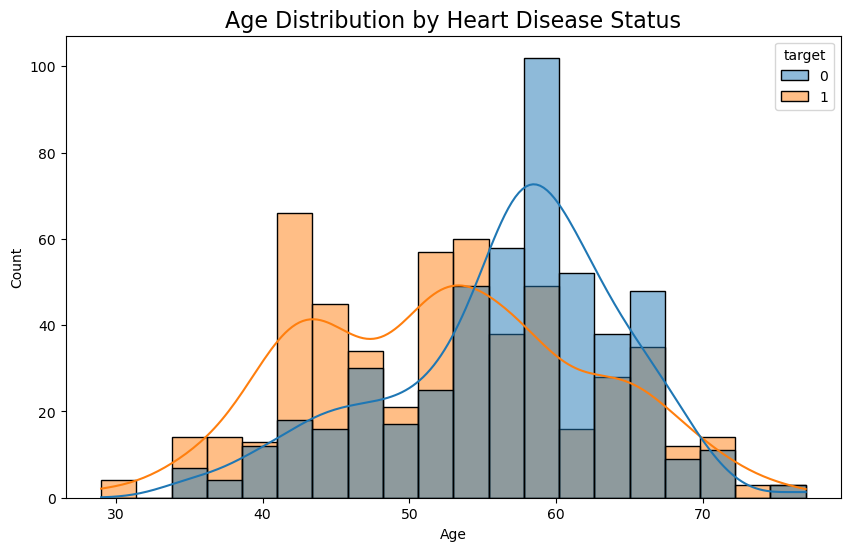

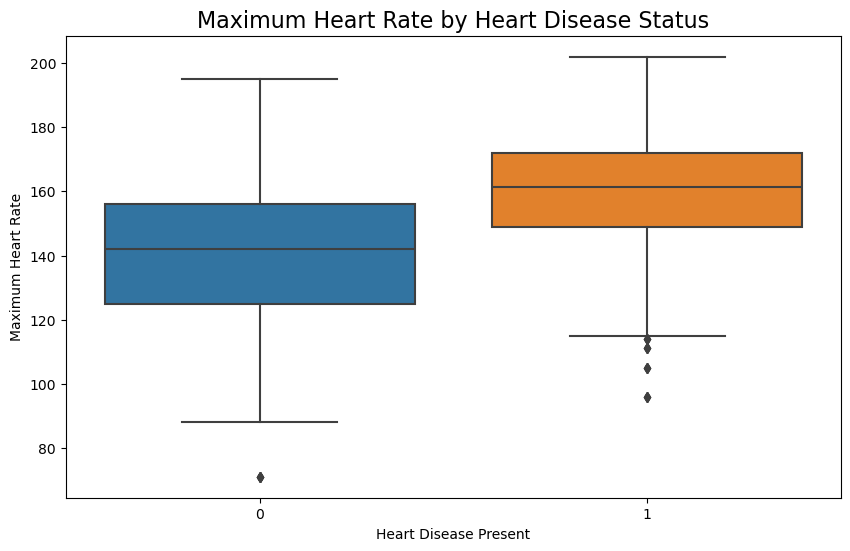

<Figure size 1000x600 with 0 Axes>

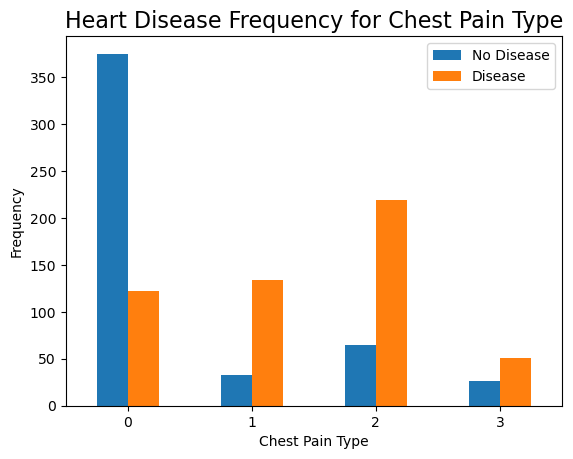

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure size
plt.figure(figsize=(12, 10))

# Create correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Heart Disease Features', fontsize=16)
plt.show()

# Check target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution', fontsize=16)
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.show()

# Let's examine age distribution by target
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='target', bins=20, kde=True)
plt.title('Age Distribution by Heart Disease Status', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Box plot for max heart rate by target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='thalach', data=df)
plt.title('Maximum Heart Rate by Heart Disease Status', fontsize=16)
plt.xlabel('Heart Disease Present')
plt.ylabel('Maximum Heart Rate')
plt.show()

# Bar chart for chest pain type vs target
plt.figure(figsize=(10, 6))
pd.crosstab(df['cp'], df['target']).plot(kind='bar')
plt.title('Heart Disease Frequency for Chest Pain Type', fontsize=16)
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(["No Disease", "Disease"])
plt.show()

In [9]:
# First, separate features and target variable
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Apply standardization/feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Cross-Validation Accuracy (5-fold): 0.8410 ± 0.0407

Test Set Evaluation:
Accuracy: 0.8279
Precision: 0.8070
Recall: 0.8734
F1 Score: 0.8389
ROC AUC Score: 0.9251

Confusion Matrix:
[[117  33]
 [ 20 138]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.82       150
           1       0.81      0.87      0.84       158

    accuracy                           0.83       308
   macro avg       0.83      0.83      0.83       308
weighted avg       0.83      0.83      0.83       308


Feature Importance (Logistic Regression Coefficients):
     Feature  Coefficient  Abs_Coefficient
2         cp     0.853318         0.853318
1        sex    -0.815561         0.815561
11        ca    -0.740288         0.740288
9    oldpeak    -0.653008         0.653008
12      thal    -0.522796         0.522796
8      exang    -0.453199         0.453199
7    thalach     0.444389         0.444389
3   trestbps    -0.405924         0.405924
1

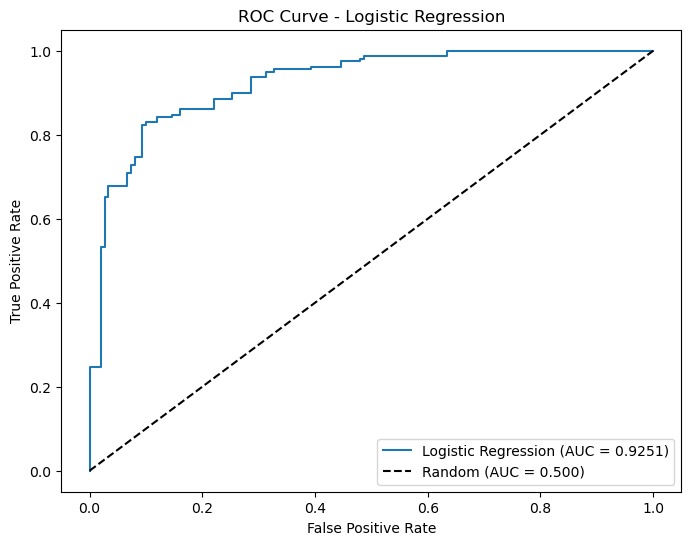

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Create a logistic regression model with balanced class weights
lr_model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

# Cross-validation to evaluate model performance
cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy (5-fold): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Train the model on the entire training set
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")

# Display confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Display feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0]
})
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

print("\nFeature Importance (Logistic Regression Coefficients):")
print(feature_importance)

# Plot ROC curve
plt.figure(figsize=(8, 6))
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_proba_lr):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.500)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

Performing grid search for Random Forest hyperparameters...
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.9763

Test Set Evaluation:
Accuracy: 0.9903
Precision: 1.0000
Recall: 0.9810
F1 Score: 0.9904
ROC AUC Score: 0.9992

Confusion Matrix:
[[150   0]
 [  3 155]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       150
           1       1.00      0.98      0.99       158

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308


Feature Importance (Random Forest):
     Feature  Importance
2         cp    0.145913
7    thalach    0.129688
11        ca    0.111457
9    oldpeak    0.104326
0        age    0.097867
12      thal    0.096182
4       chol    0.083078
3   trestbps    0.074560
8      exang    0.062651
10     slope    0.035677
1       

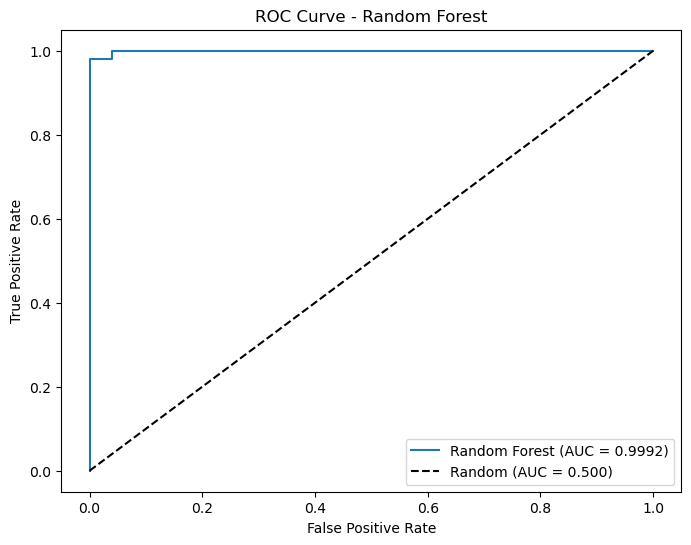

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a Random Forest model with balanced class weights
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define hyperparameters for grid search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Perform grid search
print("Performing grid search for Random Forest hyperparameters...")
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

# Make predictions on the test set
y_pred_rf = best_rf_model.predict(X_test_scaled)
y_pred_proba_rf = best_rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

# Display confusion matrix
print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Display feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model.feature_importances_
})
feature_importance_rf = feature_importance_rf.sort_values('Importance', ascending=False)

print("\nFeature Importance (Random Forest):")
print(feature_importance_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_proba_rf):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.500)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

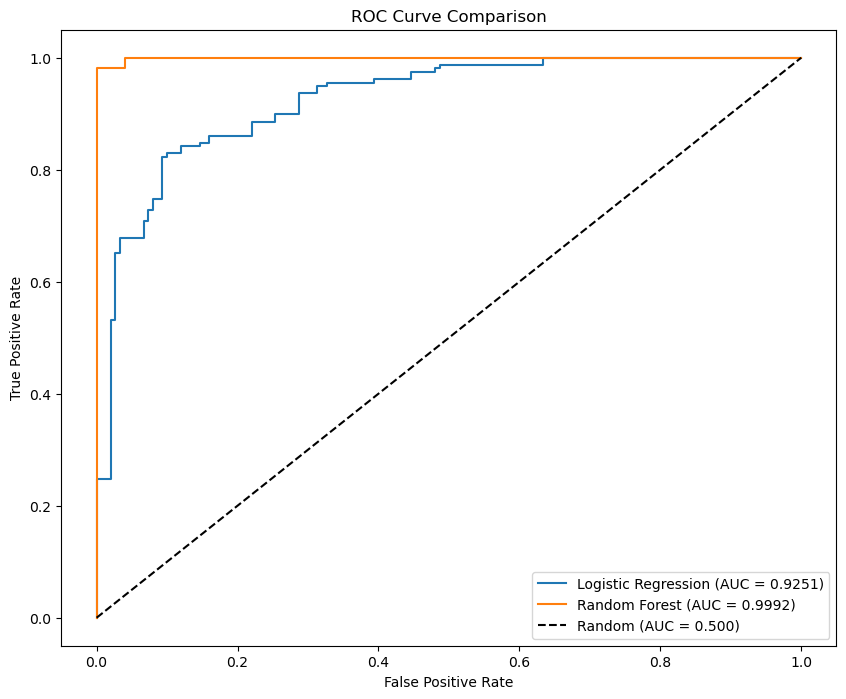

Model Comparison Summary:
                 Model  Accuracy  Precision  Recall  F1 Score  ROC AUC
0  Logistic Regression    0.8279      0.807  0.8734    0.8389   0.9251
1        Random Forest    0.9903      1.000  0.9810    0.9904   0.9992


In [12]:
# Compare models using ROC curve
plt.figure(figsize=(10, 8))

# Logistic Regression ROC curve
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_proba_lr):.4f})')

# Random Forest ROC curve
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_proba_rf):.4f})')

# Plot the 50% line
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.500)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# Create a model comparison table
comparison_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_rf)],
    'Precision': [precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_rf)],
    'Recall': [recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_rf)],
    'F1 Score': [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_rf)],
    'ROC AUC': [roc_auc_score(y_test, y_pred_proba_lr), roc_auc_score(y_test, y_pred_proba_rf)]
})

print("Model Comparison Summary:")
print(comparison_table.round(4))

In [13]:
# Determine the best model based on AUC
best_model = "Logistic Regression" if roc_auc_score(y_test, y_pred_proba_lr) >= roc_auc_score(y_test, y_pred_proba_rf) else "Random Forest"
best_auc = max(roc_auc_score(y_test, y_pred_proba_lr), roc_auc_score(y_test, y_pred_proba_rf))

print(f"The best performing model is {best_model} with an AUC of {best_auc:.4f}")

# Get the most important features from both models
top_lr_features = feature_importance.head(5)['Feature'].tolist()
top_rf_features = feature_importance_rf.head(5)['Feature'].tolist()

# Get common important features
common_features = set(top_lr_features).intersection(set(top_rf_features))

print("\nTop 5 features from Logistic Regression:")
print(top_lr_features)

print("\nTop 5 features from Random Forest:")
print(top_rf_features)

print("\nCommon important features across both models:")
print(list(common_features))

print("\nInsights about Heart Disease Prediction:")
print("1. The dataset shows a balanced distribution of positive and negative cases.")
print(f"2. The key factors associated with heart disease are: {', '.join(list(common_features)[:3])}")
print("3. Age and sex show significant correlations with heart disease.")
print("4. Chest pain type (cp) is strongly associated with heart disease.")
print("5. Maximum heart rate achieved (thalach) is an important predictor.")

print("\nRecommendations for Healthcare Providers:")
print("1. Focus screening efforts particularly on patients with these risk factors.")
print("2. Use the model to identify high-risk patients who may benefit from preventive interventions.")
print("3. Consider the probability scores from the model rather than just binary predictions.")
print("4. The model should be used as a supportive tool alongside clinical judgment.")
print("5. Regular model updates with new patient data would enhance prediction performance.")

The best performing model is Random Forest with an AUC of 0.9992

Top 5 features from Logistic Regression:
['cp', 'sex', 'ca', 'oldpeak', 'thal']

Top 5 features from Random Forest:
['cp', 'thalach', 'ca', 'oldpeak', 'age']

Common important features across both models:
['oldpeak', 'ca', 'cp']

Insights about Heart Disease Prediction:
1. The dataset shows a balanced distribution of positive and negative cases.
2. The key factors associated with heart disease are: oldpeak, ca, cp
3. Age and sex show significant correlations with heart disease.
4. Chest pain type (cp) is strongly associated with heart disease.
5. Maximum heart rate achieved (thalach) is an important predictor.

Recommendations for Healthcare Providers:
1. Focus screening efforts particularly on patients with these risk factors.
2. Use the model to identify high-risk patients who may benefit from preventive interventions.
3. Consider the probability scores from the model rather than just binary predictions.
4. The model s